In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')
print(f'The dataset has {df.isnull().sum().sum()} missing values.')

The dataset has 150 rows and 5 columns.
The dataset has 0 missing values.


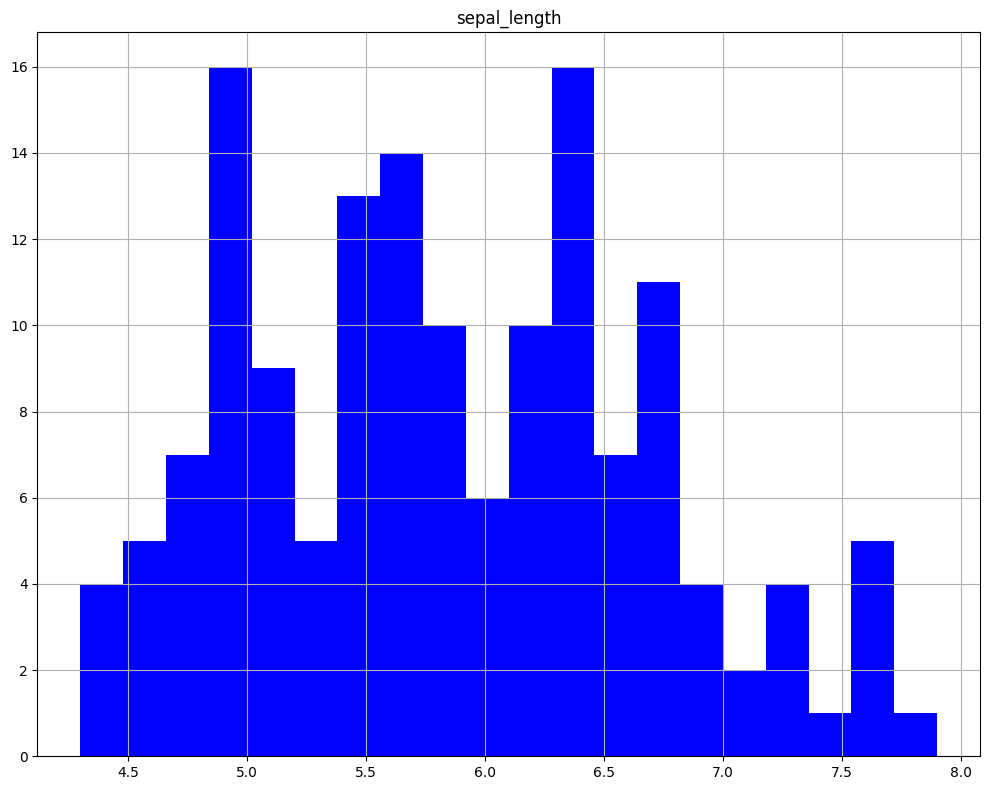

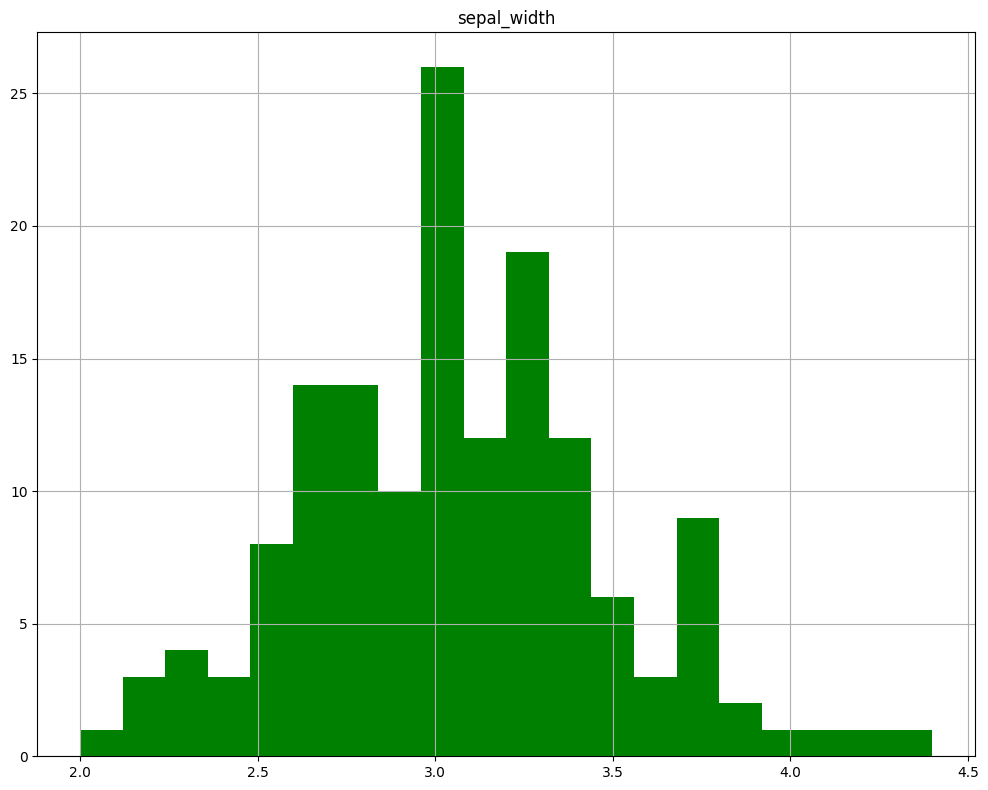

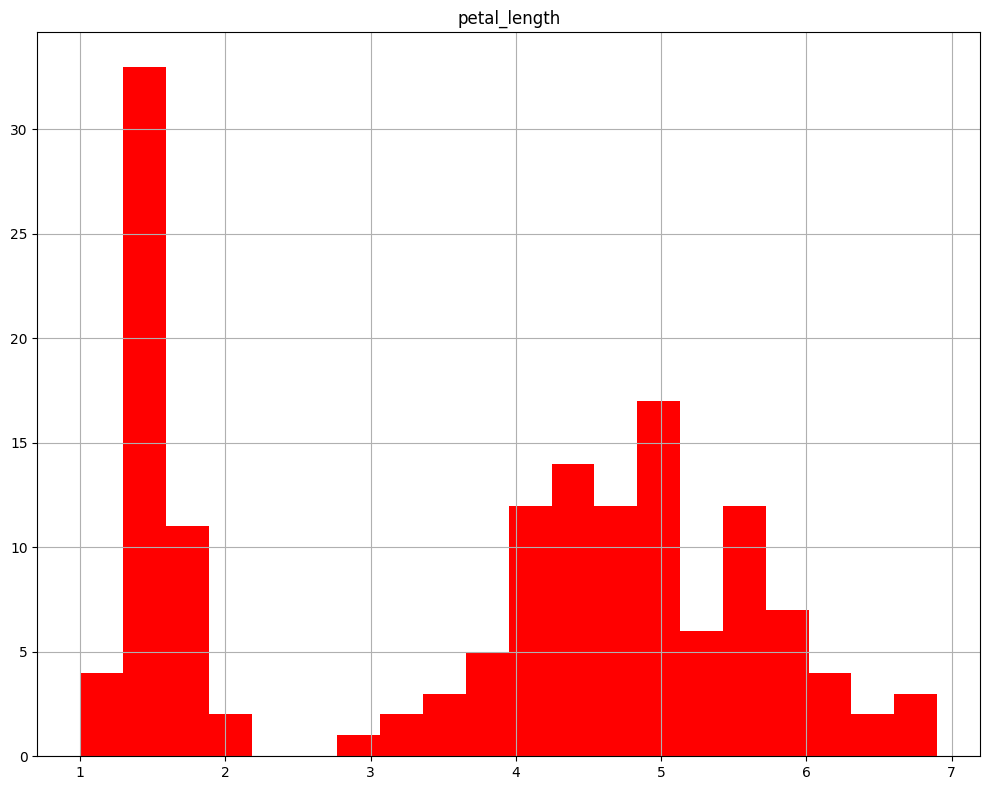

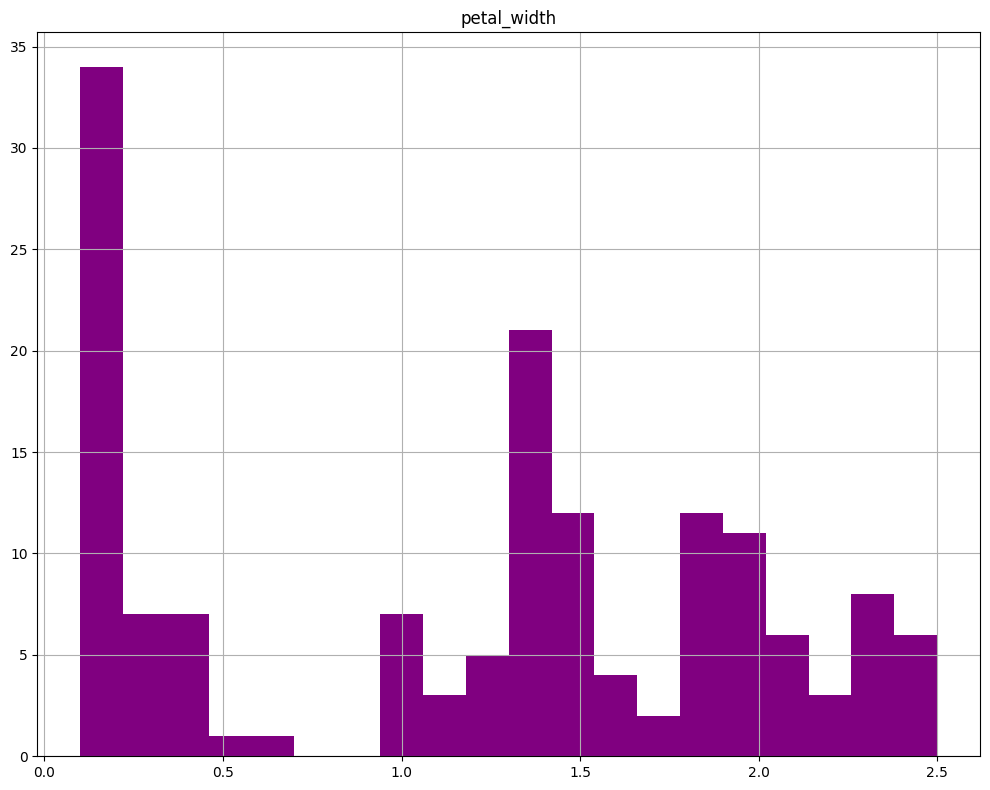

The feature with the most variability is: petal_length


In [5]:
numeric_df = df.select_dtypes(include=['number'])
colors = ['blue', 'green', 'red', 'purple']

for i, column in enumerate(numeric_df.columns):
    numeric_df[column].hist(bins=20, figsize=(10, 8), color=colors[i % len(colors)])
    plt.title(column)
    plt.tight_layout()
    plt.show()

print(f'The feature with the most variability is: {numeric_df.std().idxmax()}')

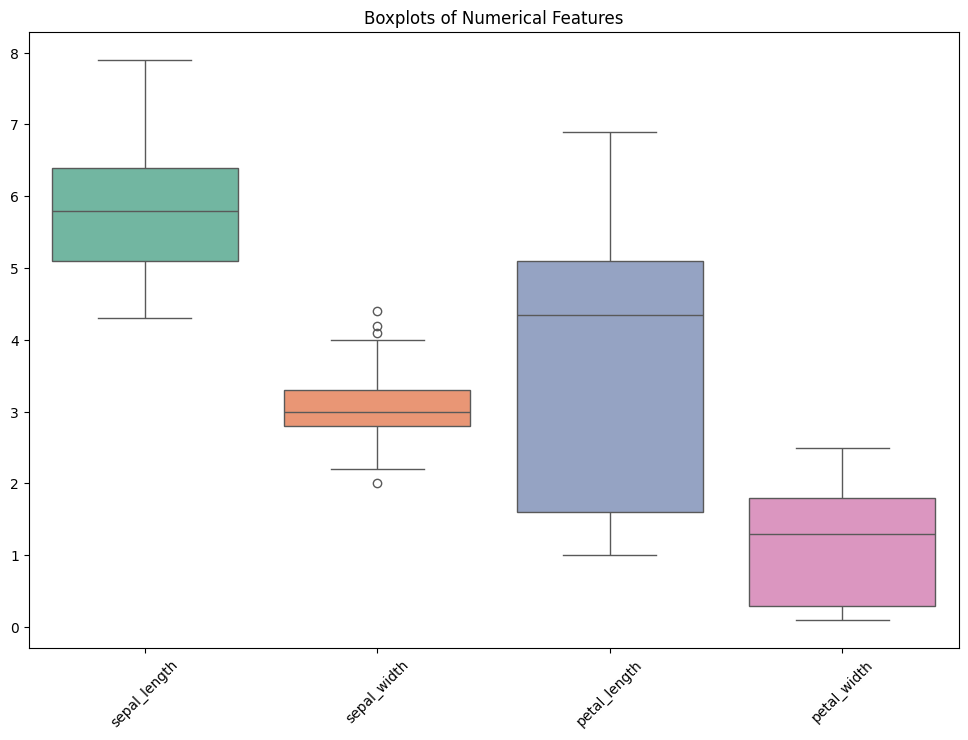

Features with outliers: ['sepal_width']
Range of values for each feature:
 sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64
The feature with the largest range is: petal_length
The feature with the smallest range is: petal_width
Petal lenght has a much larger range than the other features.


In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, palette='Set2')
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

features_with_outliers = []
for column in numeric_df.columns:
    outliers = numeric_df[(numeric_df[column] < lower_bound[column]) | (numeric_df[column] > upper_bound[column])]
    if not outliers.empty:
        features_with_outliers.append(column)

print("Features with outliers:", features_with_outliers)
ranges = numeric_df.max() - numeric_df.min()
print("Range of values for each feature:\n", ranges)

print(f'The feature with the largest range is: {ranges.idxmax()}')
print(f'The feature with the smallest range is: {ranges.idxmin()}')
print(f'Petal lenght has a much larger range than the other features.')

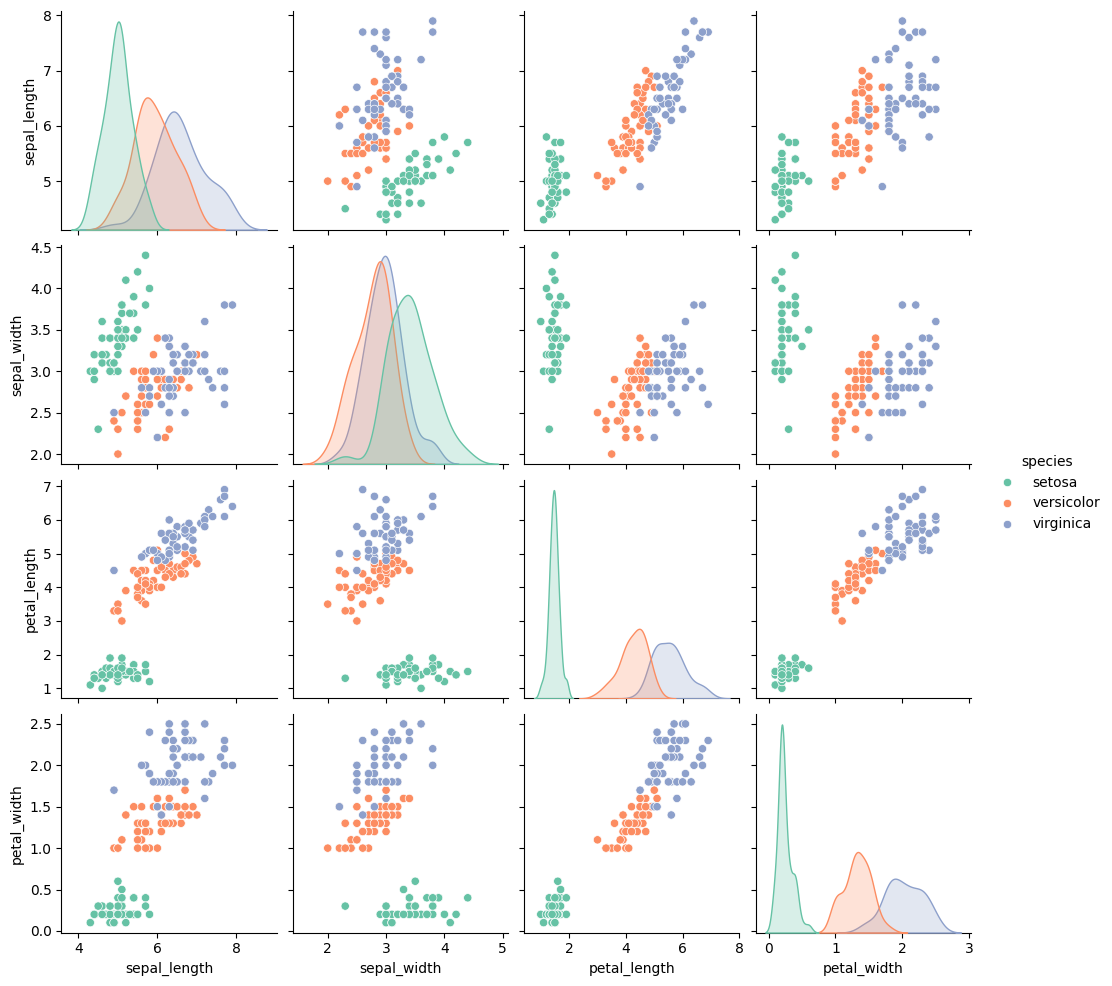

Any pair of features using either petal length or petal width can be used to separate the species.
The most correlated features are petal_length and petal_width with a correlation of 0.96.


In [18]:
sns.pairplot(df, hue='species', palette='Set2')
plt.show()

print('Any pair of features using either petal length or petal width can be used to separate the species.')
print('The most correlated features are petal length and petal width.')

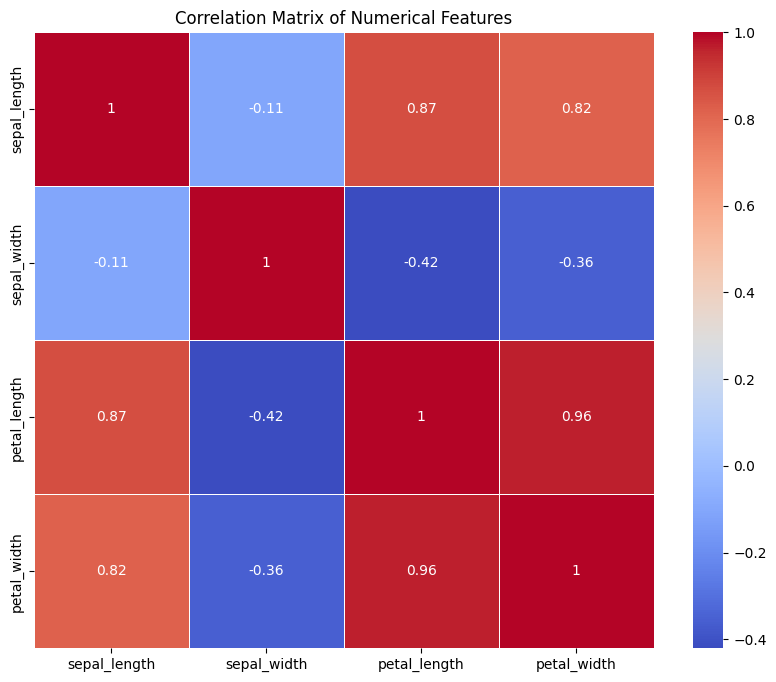

The most correlated features are petal_length and petal_width with a correlation of 0.96.
From what we have seen in the pairplot, this is expected.


In [20]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

most_correlated_features = correlation_matrix.abs().unstack().sort_values(ascending=False)
most_correlated_features = most_correlated_features[most_correlated_features != 1].reset_index()
most_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
most_correlated_pair = most_correlated_features.iloc[0]
print(f'The most correlated features are {most_correlated_pair["Feature 1"]} and {most_correlated_pair["Feature 2"]} with a correlation of {most_correlated_pair["Correlation"]:.2f}.')
print('From what we have seen in the pairplot, this is expected.')

/tmp/ipykernel_619182/4202928409.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




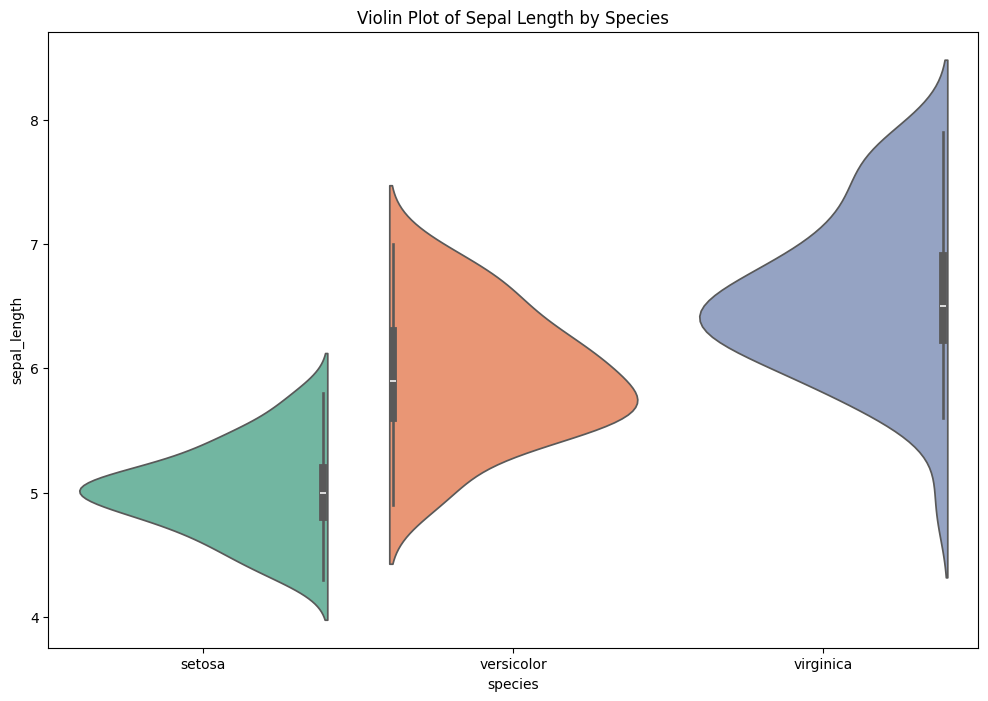

The species with the widest spread for sepal_length is: virginica
Median sepal_length by species: species
setosa        5.0
versicolor    5.9
virginica     6.5
Name: sepal_length, dtype: float64


In [41]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='species', y='sepal_length', data=df, palette='Set2', split=True)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

print(f'The species with the widest spread for sepal_length is: {df.groupby("species")["sepal_length"].std().idxmax()}')
print(f"Median sepal_length by species: {df.groupby('species')['sepal_length'].median()}")

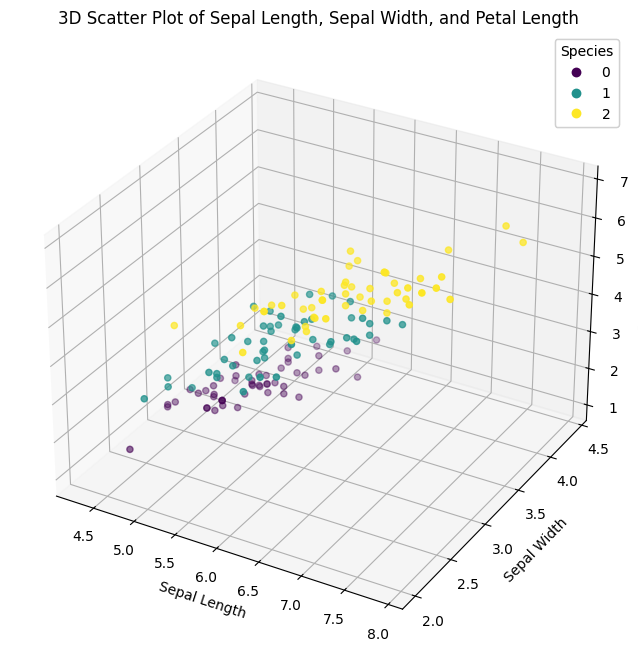

There are distinct clusters in 3D space for the species. The clusters are more apparent when visualized in three dimensions compared to pairwise scatterplots.
The clusters in the 3D scatter plot provide a more comprehensive view of the separation between species. While pairwise scatterplots show the relationship between two features at a time, the 3D scatter plot combines three features, offering a clearer distinction between the species.


In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Sepal Length, Sepal Width, and Petal Length')
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

plt.show()

print('There are distinct clusters in 3D space for the species. The clusters are more apparent when visualized in three dimensions compared to pairwise scatterplots.')
print('The clusters in the 3D scatter plot provide a more comprehensive view of the separation between species. While pairwise scatterplots show the relationship between two features at a time, the 3D scatter plot combines three features, offering a clearer distinction between the species.')

/tmp/ipykernel_619182/4271482839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_length', data=df, palette='Set2', split=True, ax=axes[1, 0])


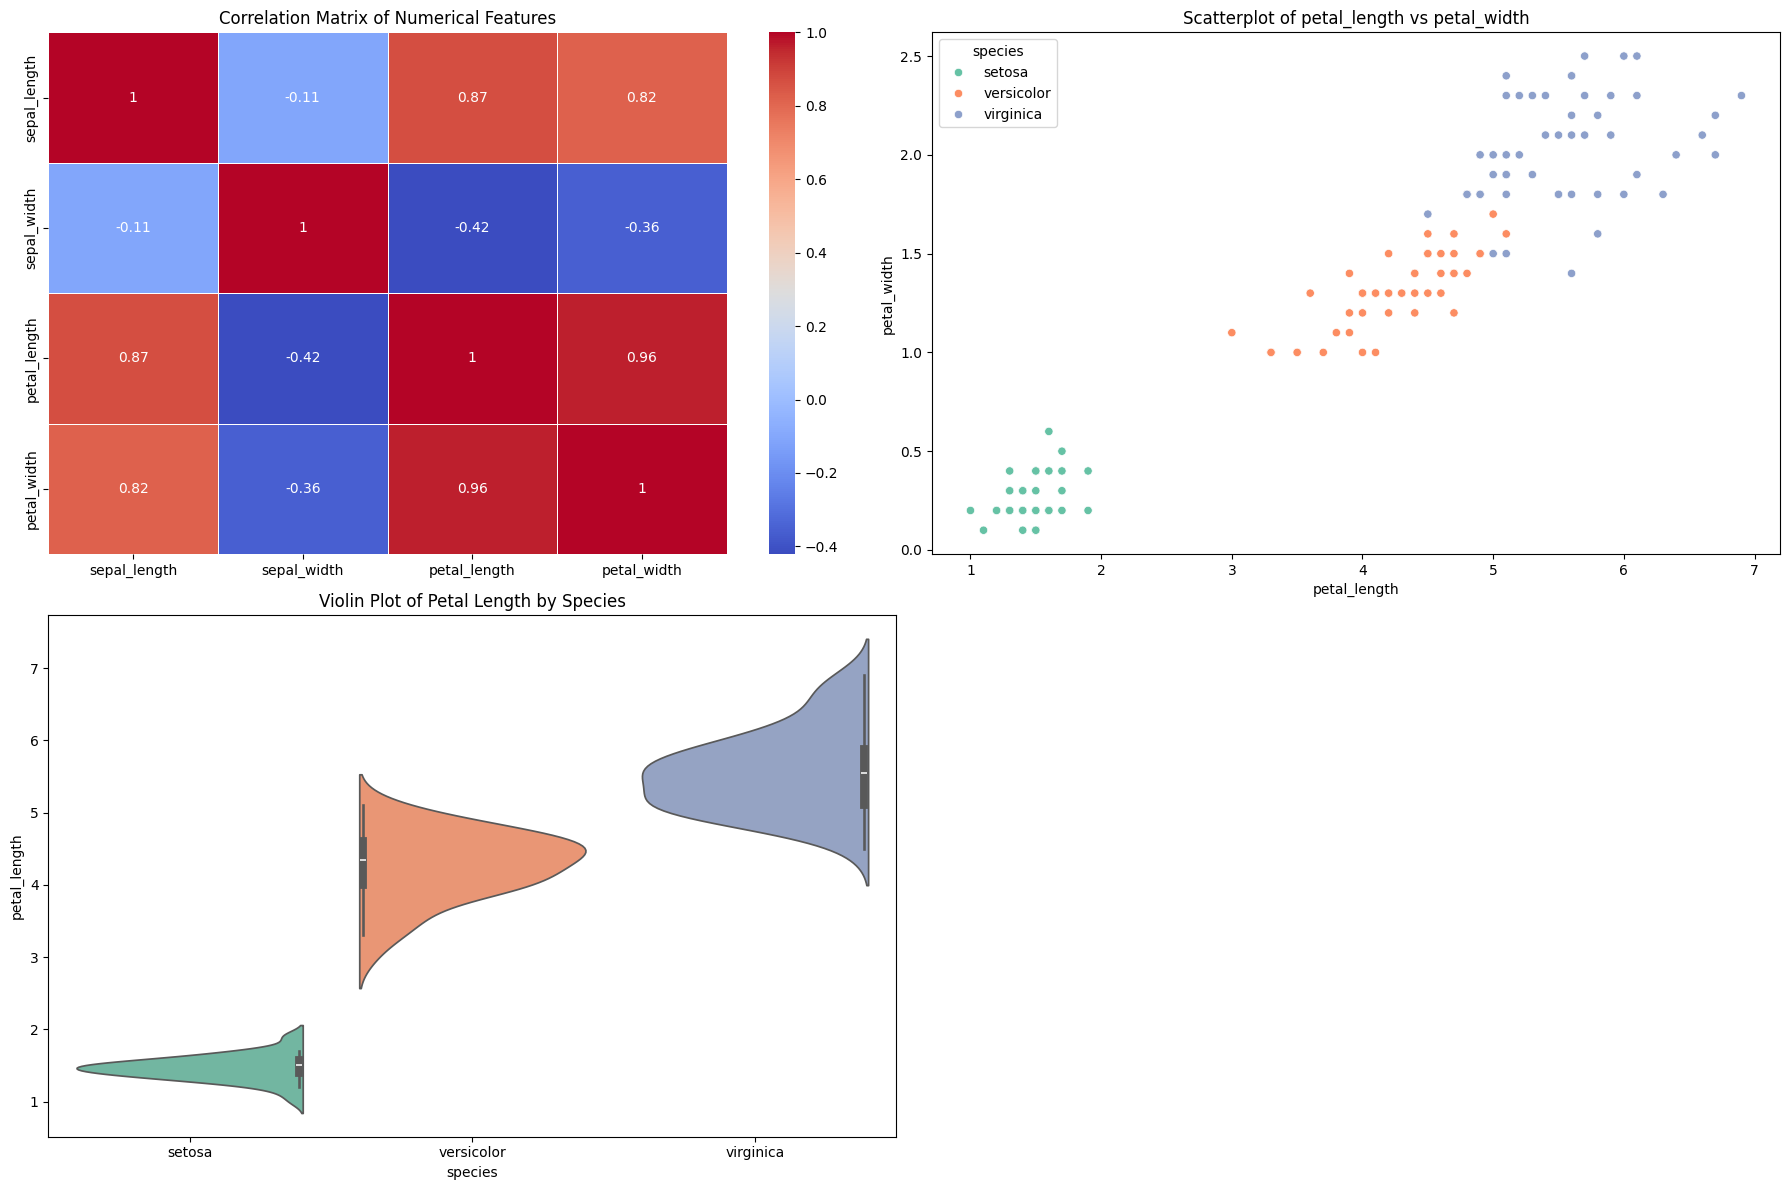

The features most useful for distinguishing species are the petal length and petal width.
I don't think there are any unexpected patterns


In [37]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix of Numerical Features')

# Scatterplot for the two most correlated features
sns.scatterplot(x=most_correlated_pair['Feature 1'], y=most_correlated_pair['Feature 2'], hue='species', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title(f'Scatterplot of {most_correlated_pair["Feature 1"]} vs {most_correlated_pair["Feature 2"]}')

# Violin plot for petal_length grouped by species
sns.violinplot(x='species', y='petal_length', data=df, palette='Set2', split=True, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Petal Length by Species')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f'The features most useful for distinguishing species are the petal length and petal width.')
print('I don\'t think there are any unexpected patterns')

In [38]:
import plotly.express as px
import plotly.graph_objects as go

fig_scatter = px.scatter(df, x=most_correlated_pair['Feature 1'], y=most_correlated_pair['Feature 2'], color='species', title=f'Scatterplot of {most_correlated_pair["Feature 1"]} vs {most_correlated_pair["Feature 2"]}')
fig_scatter.show()

for column in numeric_df.columns:
    fig_hist = px.histogram(numeric_df, x=column, nbins=20, title=f'Histogram of {column}', color_discrete_sequence=[colors[i % len(colors)]])
    fig_hist.show()